# Especidicaciones Diagrama linea y uso de librerias

In [4]:
import pandas as pd             # libreria manipulacion de datos
import matplotlib.pyplot as plt # libreria grafica general estandar 
import seaborn as sns           # libreria graficadora especial con basse en matplotlib
import plotly.express as px     # libreria graficadora interactiva
import numpy as np
%matplotlib inline

## Manejo de Datos

In [5]:
df = pd.read_csv('../data/tiendas_procesado.csv',index_col=0)
df

,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


In [4]:
df_dairy = df['DAIRY']
df_meats = df['MEATS']
df_seafood = df['SEAFOOD']

## Grafico en Pandas

Para _pandas_, graficar no es un problema ya que el internamente usa la libreria de matplotlib para hacer algunas graficas lo mas sencillo posibles para salir de apuros, pero de igual forma muy utiles. La mayoria de las implementaciones disponibles se pueden ver en [la documentacion de pandas](https://pandas.pydata.org/docs/user_guide/visualization.html).

### Graficar

Para poder graficar en pandas es tan simple como llamar al dataframe y agregrale `plot`, se puede simplemente llamar cada valor de la grafica como tambien se pueden llamar las generalidades que conforman a una grafica.

* *x,y* son claramente los valores del dataframe para graficar en su eje.
* *kind* es el tipo de grafico que existe en pandas los cuales son `bar, hist, box, kde, area, scatter, hexbin, pie`.
* tags como *title-xlabel-ylabel*
* *figsize=()* es el tamaño en inches de largo y alto.
* *style=''* es el estilo de la grafica que es en general los de matplotlib.
* *legend=''* es el cuadro con los datos en True
* *x o y_compact* en True cambia la resolucion de los ticks.
* *subplots=''* en True con la configuracion de figsize separa las graficas.
* *layout=()* define filas y columnas de las subplots.


<Axes: title={'center': 'Ventas de productos lacteos'}, xlabel='Fecha', ylabel='Ventas diarias'>

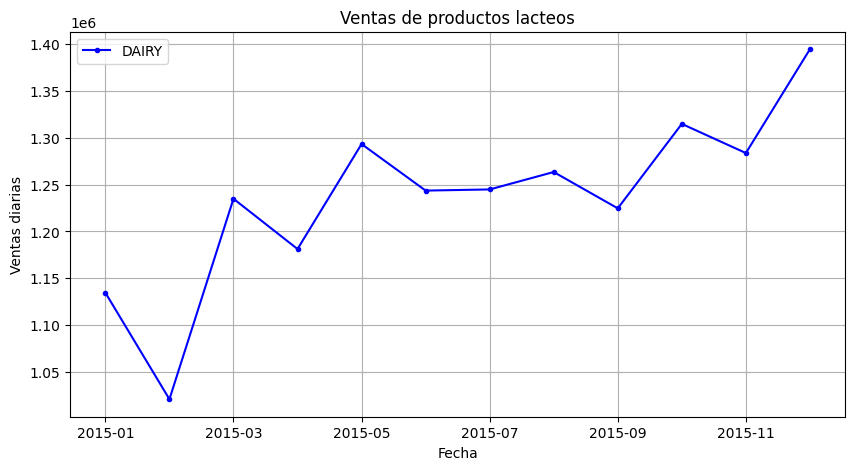

In [19]:
df_dairy.plot(
    x='fecha',                          # valores eje x
    y='DAIRY',                          # valores eje y   
    title='Ventas de productos lacteos',# titulo del grafico
    kind='line',                        # tipo de grafico
    figsize=(10,5),                     # tamaño de la figura
    color='blue',                       # color de la linea
    grid=True,                          # mostrar rejilla
    xlabel='Fecha',                     # etiqueta eje x
    ylabel='Ventas diarias',            # etiqueta eje y
    legend=True,                        # mostrar leyenda
    style='.-',                         # estilo de la linea
)

### Graficar varias

<Axes: title={'center': 'Ventas de productos'}, xlabel='Fecha', ylabel='Ventas diarias'>

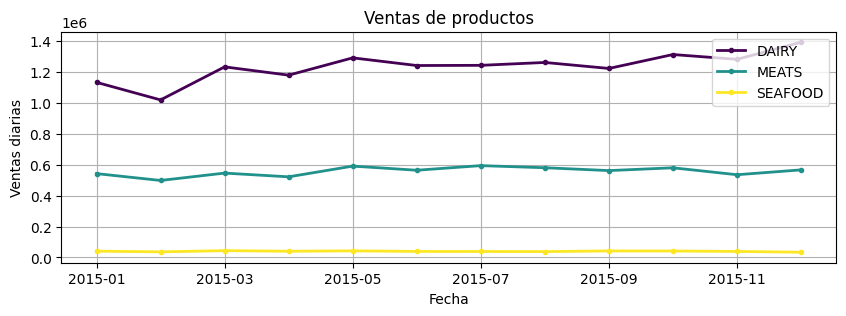

In [15]:
df[['DAIRY','MEATS','SEAFOOD']].plot(
    # x='fecha',
    y=['DAIRY','MEATS','SEAFOOD'],
    title='Ventas de productos',
    kind='line',
    figsize=(10,3),
    xlabel='Fecha',
    ylabel='Ventas diarias',
    grid=True,
    linewidth=2,
    style='.-',
    colormap='viridis',
)


### Graficar subplots

array([[<Axes: xlabel='fecha'>],
       [<Axes: xlabel='fecha'>],
       [<Axes: xlabel='fecha'>]], dtype=object)

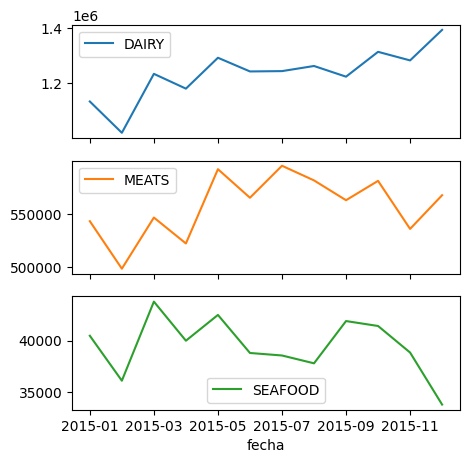

In [22]:
df.plot(
    subplots=True,
    layout=(3,1),
    figsize=(5,5),
)

De igual manera que matplotlib, se puede especificar el tipo de grafico.

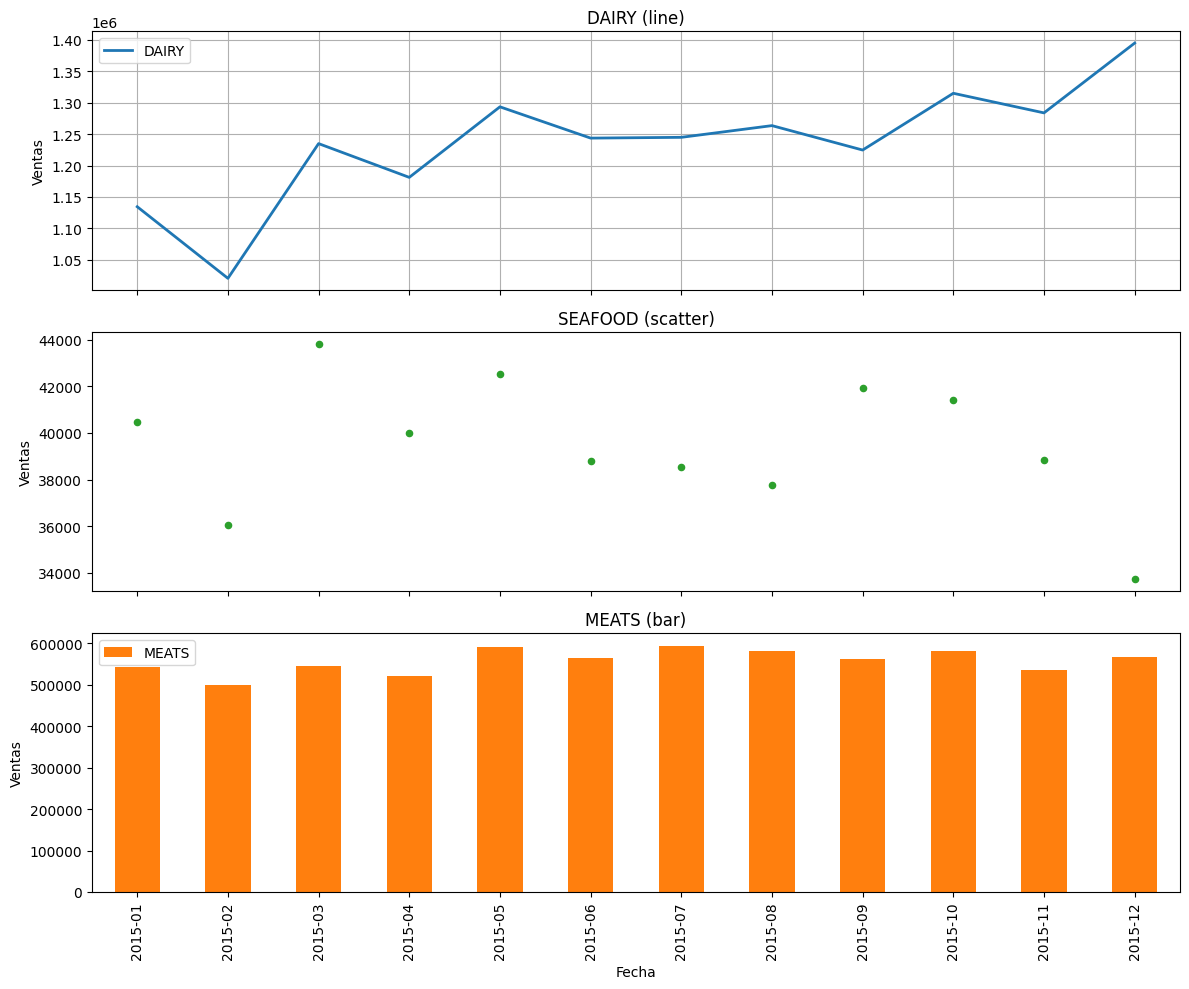

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
df1 = df.reset_index().copy()
# Line plot for DAIRY
df1.plot(y='DAIRY', kind='line', ax=axes[0],
    title='DAIRY (line)', color='tab:blue', grid=True, linewidth=2)
axes[0].set_xlabel('')
axes[0].set_ylabel('Ventas')

# Scatter plot for SEAFOOD
df1.plot(x='fecha', y='SEAFOOD', kind='scatter', ax=axes[1],
    title='SEAFOOD (scatter)', color='tab:green')
axes[1].set_xlabel('')
axes[1].set_ylabel('Ventas')

# Bar plot for MEATS
df1.plot(x='fecha', y='MEATS', kind='bar', ax=axes[2],
    title='MEATS (bar)', color='tab:orange')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Ventas')

plt.tight_layout()
plt.show()

## Grafico en matplotlib

### Grafico basico
Para el grafico en matplotlib es muy similar a pandas porque de este se sustenta pandas, pero es mucho mas completo por las opciones que tiene y se puede ver en [la docuemntacion de matplotlib](https://matplotlib.org/stable/plot_types/index.html).

Importante mencionar que matplotlib trata estas graficas diferentes como objetos.

![plot mat](images/plot_mat.png)

Los graficos en matplotlib se establecen con el llamado general plt, normalmente saca la figura de la imagen y dependiendo del tipo puede exportar algo mas.

* Para establecer un tipo de grafico se coloca plt._tipo de grafico_, los tipos de graficos son plot(lineas), scatter(puntos), bar(barras), stem(pulsos), hist(histograma), boxplot(caja), errorbar(cajas compacto), violinplot(violin), pie(rueda) entro otros muchos para demostraciones mas especificas.

Al llamar la funcion plot las caracteristicas que tiene son:
* *x* son los valores del eje X.
* *y* son los valores del eje y.
* *color* para definir el color puede ser ascii o hex.
* *linestyle* es el estilo de la linea que puede ser muchas pero se pueden ver en la siguiente image.

![linestyle](images/linestyle%20matplot.png)

* *linewidth* define el grosor 
* *marker* define el estilo de marcado en cada punto, hay muchos en la pagina.
* *markersize* define el tamaño del marcador.
* *title* titulo del grafico
* *xlabel y ylabel* etiqueta de los ejes
* *figsize* define el tamaño de la imagen
* *kind* se puede establecer el tipo de linea tambien.


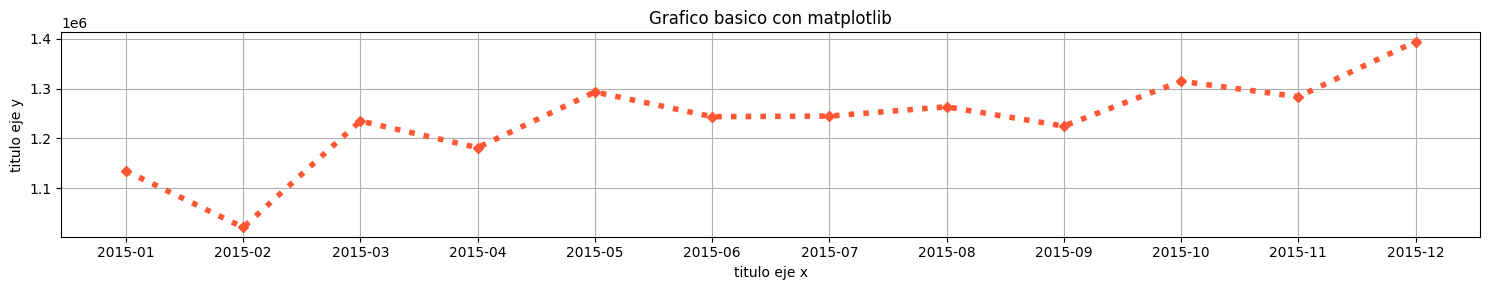

In [17]:
# Usando la API de matplotlib correctamente
fig, ax = plt.subplots(figsize=(15, 3))
x = df.reset_index()['fecha']  # o df.index si ya es índice de fechas
y = df['DAIRY']

ax.plot(x, y,
    color='#FF5733',
    linestyle=':',    # "dotted" en matplotlib es ':'
    linewidth=4,
    marker='D',
    markersize=5)

ax.set_title('Grafico basico con matplotlib')
ax.set_xlabel('titulo eje x')
ax.set_ylabel('titulo eje y')
ax.grid(True)

plt.tight_layout()
plt.show()

Tambien esto tiene generalidades como por ejemplo:
```python
plt.rcParams['figure.figsize'] = (15,3) # Cambia el tamaño por defecto de las figuras
plt.style.use('ggplot') # Cambia el tema de las gráficas
```

### Diseño subplot

<Axes: title={'center': 'SEAFOOD (bar)'}, xlabel='fecha'>

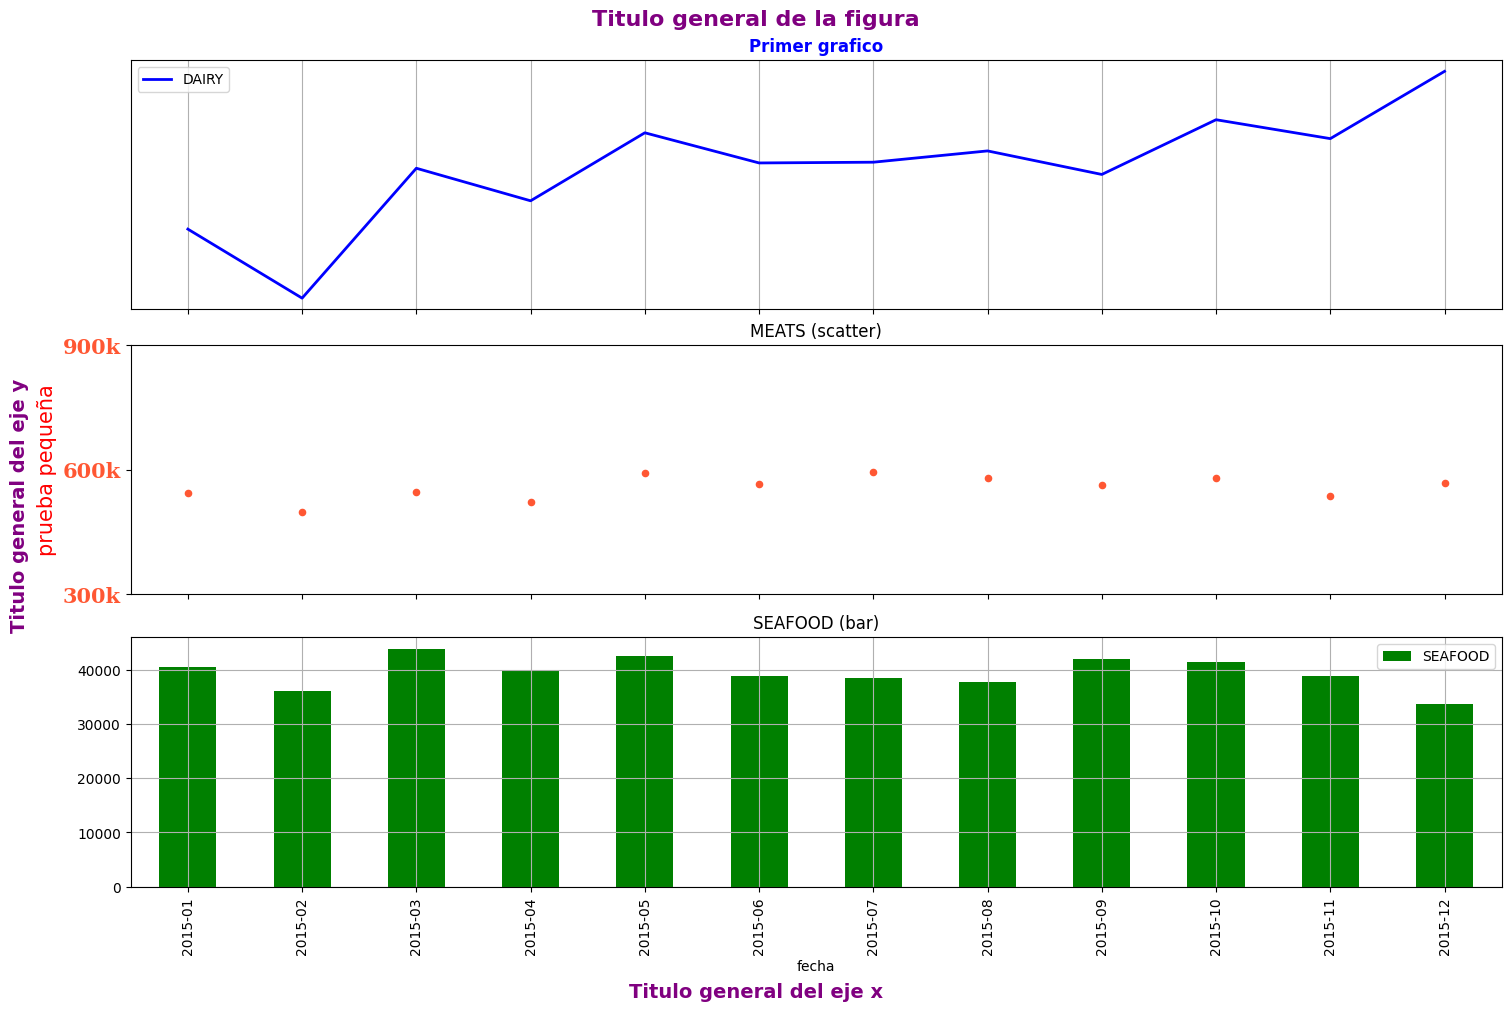

In [19]:
fig,ax = plt.subplots(3,1,figsize=(15,10),sharex=True,constrained_layout=True) # 3 filas, 1 columna, tamaño grafica, compartir eje x, ajustar layout
# fig es la figura completa, ax es un array con los ejes individuales
df1 = df.reset_index().copy() # resetear indice para tener la fecha como columna
# caracteristicas generales
fig.suptitle(
    'Titulo general de la figura',
    fontsize=16,
    fontweight='bold',
    color='purple'
)
fig.supylabel(
    'Titulo general del eje y',
    fontsize=14,
    fontweight='bold',
    color='purple'
)
fig.supxlabel(
    'Titulo general del eje x',
    fontsize=14,
    fontweight='bold',
    color='purple'
)
# primer grafico
df1.plot(
    x='fecha',
    y='DAIRY',
    kind='line',
    ax=ax[0], # primer eje
    title='DAIRY (line)',
    color='blue',
    grid=True,
    linewidth=2
)
ax[0].set_xlabel('') # quitar etiqueta del eje x
ax[0].set_ylabel('') # quitar etiqueta del eje y
ax[0].set_xticks([]) # quitar marcas del eje x
ax[0].set_yticks([]) # quitar marcas del eje y
ax[0].set_xticklabels([]) # quitar etiquetas del eje x
ax[0].set_yticklabels([]) # quitar etiqueta del eje y
ax[0].set_title(
    'Primer grafico',
    fontdict={ # diccionario de fuente
        'fontsize':12,
        'fontweight':'bold',
        'color':'blue'
    },
    loc='center' # lugar donde se coloca right left center
)
# segundo grafico
df1.plot(
    x='fecha',
    y='MEATS',
    kind='scatter',
    ax=ax[1], # segundo eje
    title='MEATS (scatter)',
    color='#FF5733',
    grid=False,
)
ax[1].set_xlabel('prueba pequeña', fontsize=5, color='red') # cambiar etiqueta del eje x
ax[1].set_xticks([4,8])
ax[1].set_xticklabels(
    ['2015-04','2015-08'],
    rotation=0,
    fontdict={
        'family':'serif',
        'color':'#FF5733',
        'weight':'bold',
        'size':15,
    }
)
ax[1].set_ylabel('prueba pequeña', fontsize=15, color='red') # cambiar etiqueta del eje y
ax[1].set_yticks([300000,600000,900000])
ax[1].set_yticklabels(
    ['300k','600k','900k'],
    fontdict={
        'family':'serif',
        'color':'#FF5733',
        'weight':'bold',
        'size':15,
    }
)
# tercer grafico
df1.plot(
    x='fecha',
    y='SEAFOOD',
    kind='bar',
    ax=ax[2], # tercer eje
    title='SEAFOOD (bar)',
    color='green',
    grid=True,
    linewidth=2
)


### Anotaciones

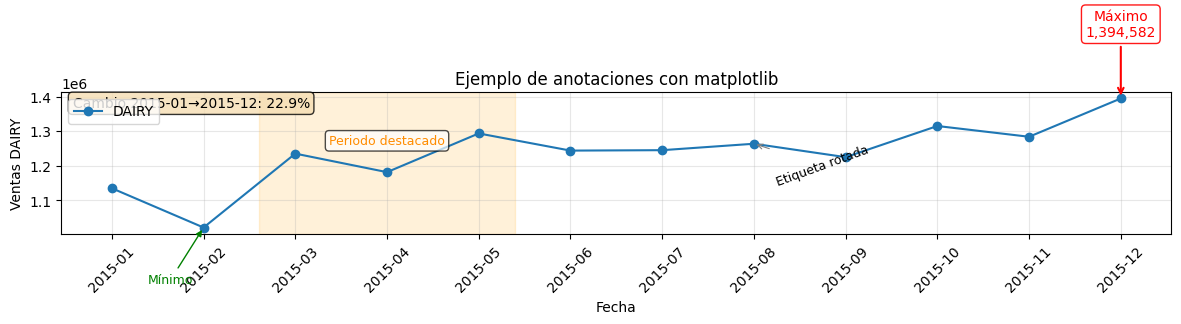

In [20]:
# Demostración de anotaciones (annotate) en un gráfico usando los datos existentes (df1)
# Usa plt, np y df1 ya disponibles en el notebook.

# Preparar datos (usar posiciones numéricas para un control claro de las anotaciones)
x = np.arange(len(df1))         # posiciones x (0..11)
y = df1['DAIRY'].values         # valores a graficar
labels = df1['fecha'].values    # etiquetas de eje x

# Crear figura nueva para no sobrescribir ax/axes existentes
fig_annot, ax_annot = plt.subplots(figsize=(12, 4))

# Línea principal con marcadores
ax_annot.plot(x, y, marker='o', linestyle='-', color='tab:blue', label='DAIRY')
ax_annot.set_xticks(x)
ax_annot.set_xticklabels(labels, rotation=45)
ax_annot.set_xlabel('Fecha')
ax_annot.set_ylabel('Ventas DAIRY')
ax_annot.set_title('Ejemplo de anotaciones con matplotlib')
ax_annot.grid(alpha=0.3)

# 1) Anotar el punto máximo (con flecha y cuadro)
idx_max = int(np.argmax(y))
x_max, y_max = x[idx_max], y[idx_max]
ax_annot.annotate(
    f'Máximo\n{int(y_max):,}',          # texto
    xy=(x_max, y_max),                 # punto al que apunta
    xytext=(x_max, y_max + 180000),    # posición del texto
    ha='center',
    arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red', alpha=0.9),
    fontsize=10,
    color='red'
)

# 2) Anotar el punto mínimo (texto offset y sin recuadro)
idx_min = int(np.argmin(y))
x_min, y_min = x[idx_min], y[idx_min]
ax_annot.annotate(
    'Mínimo',
    xy=(x_min, y_min),
    xytext=(-40, -40),                 # offset en puntos
    textcoords='offset points',
    arrowprops=dict(arrowstyle='-|>', color='green'),
    fontsize=9,
    color='green'
)

# 3) Resaltar una ventana temporal (por ejemplo, meses 3 a 5)
start, end = 2, 4   # índices (ejemplo: marzo a mayo)
ax_annot.axvspan(start - 0.4, end + 0.4, color='orange', alpha=0.15)
ax_annot.text((start+end)/2, ax_annot.get_ylim()[1]*0.9, 'Periodo destacado',
              ha='center', va='center', fontsize=9, color='darkorange',
              bbox=dict(boxstyle='round', fc='white', alpha=0.7))

# 4) Añadir anotación resumen (texto fijo en la esquina con formato)
pct_change = (y[-1] - y[0]) / y[0] * 100
ax_annot.text(0.01, 0.97,
              f'Cambio {labels[0]}→{labels[-1]}: {pct_change:.1f}%',
              transform=ax_annot.transAxes,
              fontsize=10,
              verticalalignment='top',
              bbox=dict(boxstyle='round', fc='wheat', alpha=0.8))

# 5) Ejemplo de anotación con coordenadas relativas al eje (rotada)
ax_annot.annotate(
    'Etiqueta rotada',
    xy=(x[7], y[7]),
    xytext=(15, -30),
    textcoords='offset points',
    rotation=20,
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.8)
)

ax_annot.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Leyenda

* *title* titulo de la leyenda
* *labels* nombres de las leyendas
* *fontsize* tamaño de funete
* *loc* localizacion de la leyenda
* *bbox_to_anchor* en porcentaje para ajustar imagen a guardar
* *labelcolor* colores de cada leyenda lista
* *title_fontproperties* diccionario 
* *alignment* alineacion de las etiquetas
* *ncol* numero de columnas de la leyenda

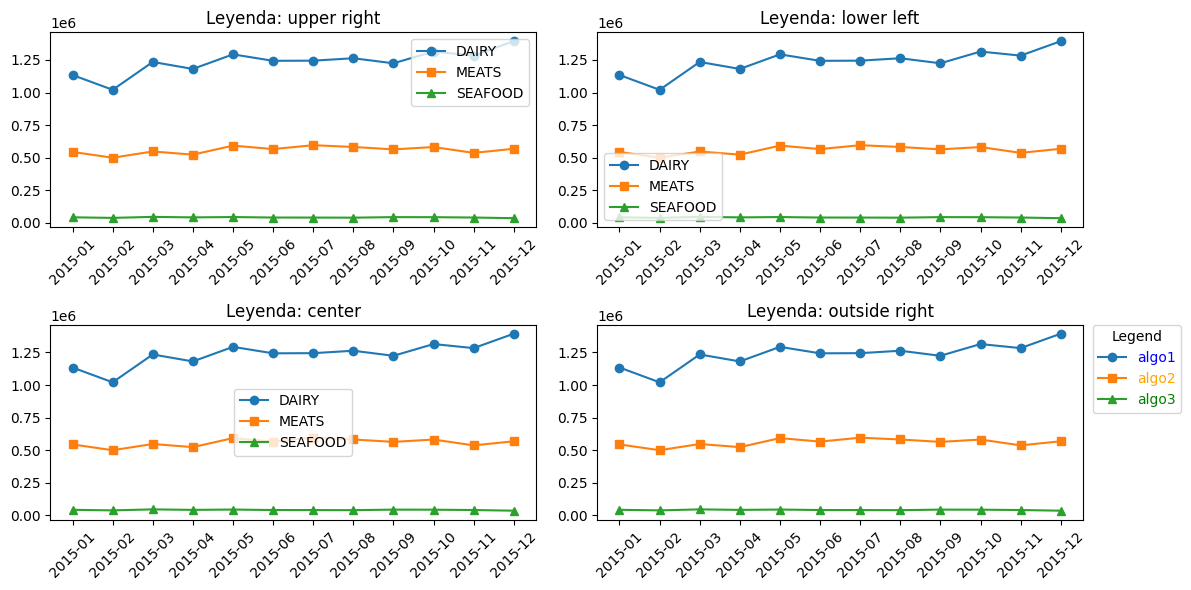

In [24]:
# Demostración sencilla: colocar la leyenda en distintas posiciones
fig_legend, axs = plt.subplots(2, 2, figsize=(12, 6))
positions = ['upper right', 'lower left', 'center', 'outside right']

for ax, pos in zip(axs.flatten(), positions):
    ax.plot(df1['fecha'], df1['DAIRY'], label='DAIRY', marker='o')
    ax.plot(df1['fecha'], df1['MEATS'], label='MEATS', marker='s')
    ax.plot(df1['fecha'], df1['SEAFOOD'], label='SEAFOOD', marker='^')
    ax.set_title(f'Leyenda: {pos}')
    ax.tick_params(axis='x', rotation=45)
    if pos == 'outside right':
        # leyenda fuera del área del gráfico (a la derecha)
        ax.legend(title='Legend',labels=['algo1','algo2','algo3'],loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0,labelcolor=['blue','orange','green'])
    else:
        ax.legend(loc=pos)

plt.tight_layout()
plt.show()

## Grafico en seaborn

## Grafico en plotly